In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
from numpy import cov
from scipy.stats import linregress
from scipy.stats import pearsonr

# California

In [2]:
# Files to open
california_overdose = pd.read_csv("csv_series/overdose_California.csv")
california_unemployment = pd.read_csv("csv_series/unemployment_states4.csv")
california_earnings = pd.read_csv("csv_series/earnings_states4.csv")


In [3]:
california_overdose.head()
california_overdose = california_overdose.sort_values(["Year"], ascending=False)
california_overdose.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
11,California,2015,11.3,NaN,4.9,NaN,0.02,NaN,-0.02,NaN
3,California,2014,11.1,NaN,5.0,NaN,0.00,NaN,0.02,NaN
2,California,2013,11.1,NaN,4.9,NaN,0.08,NaN,0.11,NaN
10,California,2012,10.3,NaN,4.4,NaN,-0.04,NaN,-0.12,NaN
16,California,2011,10.7,NaN,5.0,NaN,0.01,NaN,0.00,NaN


In [4]:
california_unemployment.head()

,state_id,year,unemployment_rate
0,4,2018,4.1
1,4,2017,4.4
2,4,2016,5.3
3,4,2015,5.7
4,4,2014,6.9


In [5]:
california_earnings.head()

,state_id,year,earnings,pct_change
0,4,2018,14876010,2.2
1,4,2017,14558652,1.9
2,4,2016,14288358,2.7
3,4,2015,13916502,3.1
4,4,2014,13501711,3.0


In [6]:
combined_unemp_earn = pd.merge(california_unemployment, california_earnings, how="outer", on=['year'])
combined_unemp_earn.head()

,state_id_x,year,unemployment_rate,state_id_y,earnings,pct_change
0,4,2018,4.1,4.0,14876010.0,2.2
1,4,2017,4.4,4.0,14558652.0,1.9
2,4,2016,5.3,4.0,14288358.0,2.7
3,4,2015,5.7,4.0,13916502.0,3.1
4,4,2014,6.9,4.0,13501711.0,3.0


In [7]:
clean_unemp_earn = combined_unemp_earn[['state_id_x', 'year', 'unemployment_rate', 'earnings', 'pct_change']]
clean_unemp_earn = clean_unemp_earn.rename(columns={"state_id_x":"state", 'year': 'Year'})
clean_unemp_earn.head()

,state,Year,unemployment_rate,earnings,pct_change
0,4,2018,4.1,14876010.0,2.2
1,4,2017,4.4,14558652.0,1.9
2,4,2016,5.3,14288358.0,2.7
3,4,2015,5.7,13916502.0,3.1
4,4,2014,6.9,13501711.0,3.0


In [8]:
california_combined = pd.merge(clean_unemp_earn, california_overdose, how="outer", on=['Year'])
california_combined_df = california_combined[['Location','Year','unemployment_rate', 'earnings', 'pct_change', 
                                        'All Drug Overdose Death Rate (Age-Adjusted)', 
                                        'Opioid Overdose Death Rate (Age-Adjusted)',
                                        'Percent Change in All Drug Overdose Death Rate from Prior Year', 
                                        'Percent Change in Opioid Overdose Death Rate from Prior Year']]
california_combined_df

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,NaN,2018,4.1,14876010.0,2.2,NaN,NaN,NaN,NaN
1,NaN,2017,4.4,14558652.0,1.9,NaN,NaN,NaN,NaN
2,NaN,2016,5.3,14288358.0,2.7,NaN,NaN,NaN,NaN
3,California,2015,5.7,13916502.0,3.1,11.3,4.9,0.02,-0.02
4,California,2014,6.9,13501711.0,3.0,11.1,5.0,0.00,0.02
5,California,2013,8.3,13104595.0,3.3,11.1,4.9,0.08,0.11
6,California,2012,9.7,12684429.0,3.4,10.3,4.4,-0.04,-0.12
7,California,2011,11.2,12265487.0,1.8,10.7,5.0,0.01,0.00
8,California,2010,12.2,12044614.0,-1.3,10.6,5.0,-0.01,-0.04
9,California,2009,12.1,12206122.0,-6.4,10.7,5.2,0.03,0.08


In [9]:
california_combined_sort = california_combined_df.sort_values(['Year'], ascending=True)
california_combined_sort.reset_index(drop=True, inplace=True)
california_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,California,1999,NaN,NaN,NaN,8.1,4.5,NaN,NaN
1,California,2000,4.7,NaN,NaN,5.8,3.0,-0.28,-0.33
2,California,2001,6.4,NaN,NaN,3.6,1.6,-0.38,-0.47
3,California,2002,6.8,12461949.0,-1.6,8.7,4.2,1.42,1.63
4,California,2003,6.6,12447085.0,-0.1,8.9,4.0,0.02,-0.05


In [10]:
california_combined_sort['earnings_index'] = (california_combined_sort['earnings']/california_combined_sort.loc[3,'earnings'])*100
california_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
0,California,1999,NaN,NaN,NaN,8.1,4.5,NaN,NaN,NaN
1,California,2000,4.7,NaN,NaN,5.8,3.0,-0.28,-0.33,NaN
2,California,2001,6.4,NaN,NaN,3.6,1.6,-0.38,-0.47,NaN
3,California,2002,6.8,12461949.0,-1.6,8.7,4.2,1.42,1.63,100.000000
4,California,2003,6.6,12447085.0,-0.1,8.9,4.0,0.02,-0.05,99.880725


In [11]:
california_combined_final = california_combined_sort.dropna()
california_combined_final

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
3,California,2002,6.8,12461949.0,-1.6,8.7,4.2,1.42,1.63,100.000000
4,California,2003,6.6,12447085.0,-0.1,8.9,4.0,0.02,-0.05,99.880725
5,California,2004,5.8,12609942.0,1.3,8.8,4.0,-0.01,0.00,101.187559
6,California,2005,5.1,12877981.0,2.1,9.0,3.8,0.02,-0.05,103.338418
7,California,2006,4.9,13125809.0,1.9,9.6,4.1,0.07,0.08,105.327096
8,California,2007,5.9,13216728.0,0.7,10.5,4.5,0.09,0.10,106.056669
9,California,2008,9.2,13039293.0,-1.3,10.4,4.8,-0.01,0.07,104.632855
10,California,2009,12.1,12206122.0,-6.4,10.7,5.2,0.03,0.08,97.947135
11,California,2010,12.2,12044614.0,-1.3,10.6,5.0,-0.01,-0.04,96.651126
12,California,2011,11.2,12265487.0,1.8,10.7,5.0,0.01,0.00,98.423505


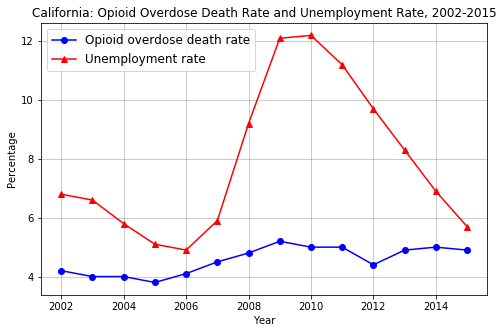

In [12]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = california_combined_final['Year']

# Plot both of these lines so that they will appear on our final chart
overdose_handle, = plt.plot(x_axis, california_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
                            color='blue', label='Opioid overdose death rate')
unemployment_handle, = plt.plot(x_axis, california_combined_final['unemployment_rate'], marker='^', 
                                color='red', label="Unemployment rate")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("California: Opioid Overdose Death Rate and Unemployment Rate, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Percentage")
 
plt.savefig("images/California_overdose_unemployment.png")
plt.show()



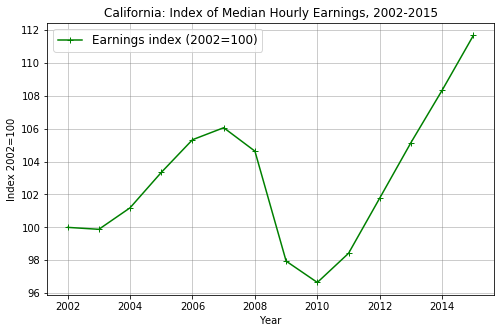

In [13]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = california_combined_final['Year']

earnings_handle, = plt.plot(x_axis, california_combined_final['earnings_index'], marker='+', 
                                 color='green', label="Earnings index (2002=100)")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("California: Index of Median Hourly Earnings, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Index 2002=100")
 
plt.savefig("images/California_earnings_index.png")
plt.show()

# Correlation between overdose and unemployment

In [24]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(california_combined_final['unemployment_rate'],
                                                        california_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * california_combined_final['unemployment_rate'] + intercept

In [25]:
corr, _ = pearsonr(california_combined_final['unemployment_rate'], california_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.697


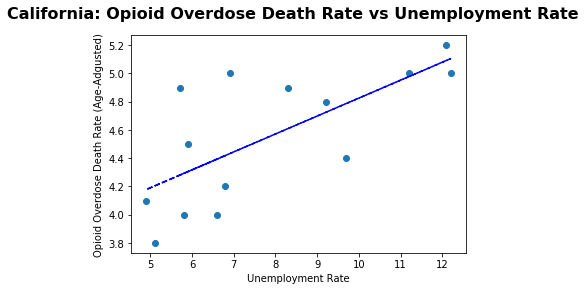

In [26]:
fig, ax = plt.subplots()

fig.suptitle("California: Opioid Overdose Death Rate vs Unemployment Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(california_combined_final['unemployment_rate'], 
        california_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(california_combined_final['unemployment_rate'], fit, 'b--')

plt.savefig("images/California_corr_overdose_unemployment.png")
plt.show()

# Correlation between overdose and earnings

In [17]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(california_combined_final['earnings_index'],
                                                        california_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * california_combined_final['earnings_index'] + intercept

In [18]:
corr, _ = pearsonr(california_combined_final['earnings_index'], california_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.035


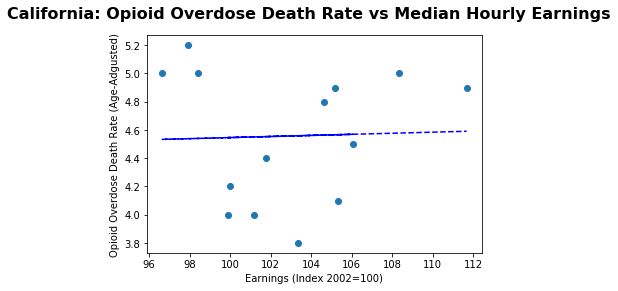

In [19]:
fig, ax = plt.subplots()

fig.suptitle("California: Opioid Overdose Death Rate vs Median Hourly Earnings", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Earnings (Index 2002=100)")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(california_combined_final['earnings_index'], 
        california_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(california_combined_final['earnings_index'], fit, 'b--')

plt.savefig("images/California_corr_overdose_earnings.png")
plt.show()